# Scikit-Learn

In [1]:
%%bash
pip3 install -U scikit-learn==0.22.1
pip3 install -U matplotlib==3.1.3

Requirement already up-to-date: scikit-learn==0.22.1 in /Users/ravil/.venv/mlfw/lib/python3.7/site-packages (0.22.1)
Requirement already up-to-date: matplotlib==3.1.3 in /Users/ravil/.venv/mlfw/lib/python3.7/site-packages (3.1.3)


In [2]:
import utils

import numpy as np

RANDOM_STATE = 3

## Dataset

In [3]:
X_train, X_test, y_train, y_test = utils.make_binary_classification_dataset(random_state=RANDOM_STATE)

print('Train features shape:', X_train.shape)
print('Test  features shape:', X_test.shape)
print('Train labels shape:', y_train.shape)
print('Test  labels shape:', y_test.shape)

Train features shape: (700, 2)
Test  features shape: (300, 2)
Train labels shape: (700,)
Test  labels shape: (300,)


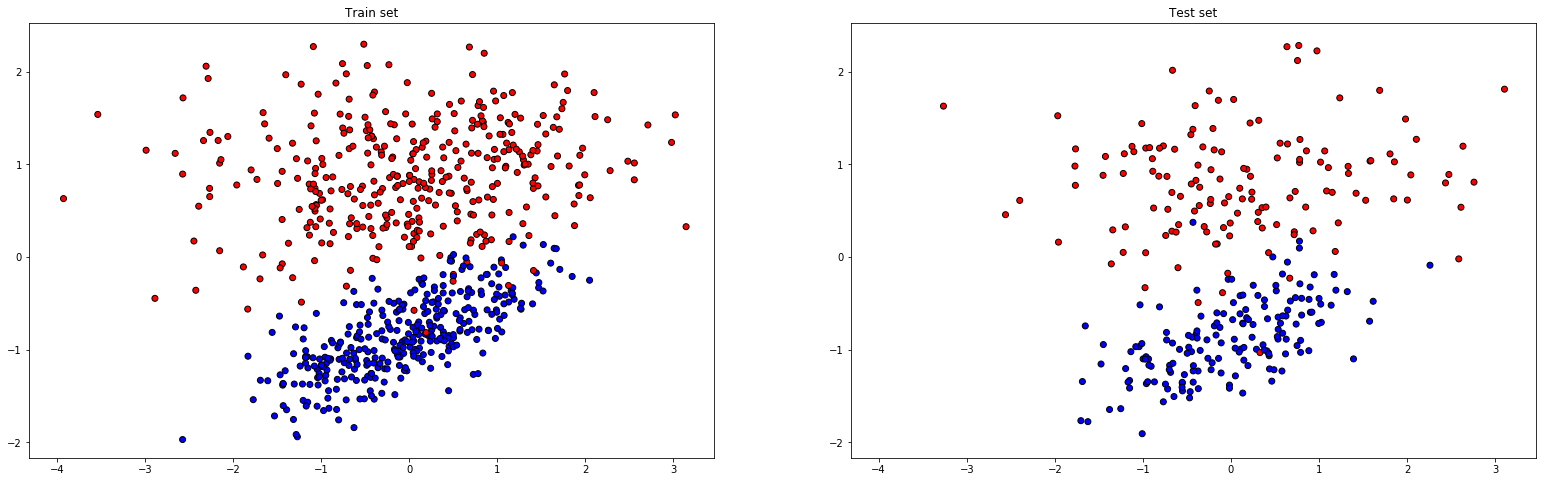

In [4]:
utils.plot_dataset(X_train, X_test, y_train, y_test)

## Classifiers

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = {
    'Nearest Neighbors': KNeighborsClassifier(3),
    'Linear SVM': SVC(kernel='linear', C=0.025),
    'RBF SVM': SVC(gamma=2, C=1),
    'Gaussian Process': GaussianProcessClassifier(1.0 * RBF(1.0)),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    'Neural Net': MLPClassifier(alpha=1, max_iter=1000),
    'AdaBoost': AdaBoostClassifier(),
    'Naive Bayes': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
}

for name, clf in classifiers.items():
    print('Fit classifier:', name)
    clf.fit(X_train, y_train)

Fit classifier: Nearest Neighbors
Fit classifier: Linear SVM
Fit classifier: RBF SVM
Fit classifier: Gaussian Process
Fit classifier: Decision Tree
Fit classifier: Random Forest
Fit classifier: Neural Net
Fit classifier: AdaBoost
Fit classifier: Naive Bayes
Fit classifier: QDA


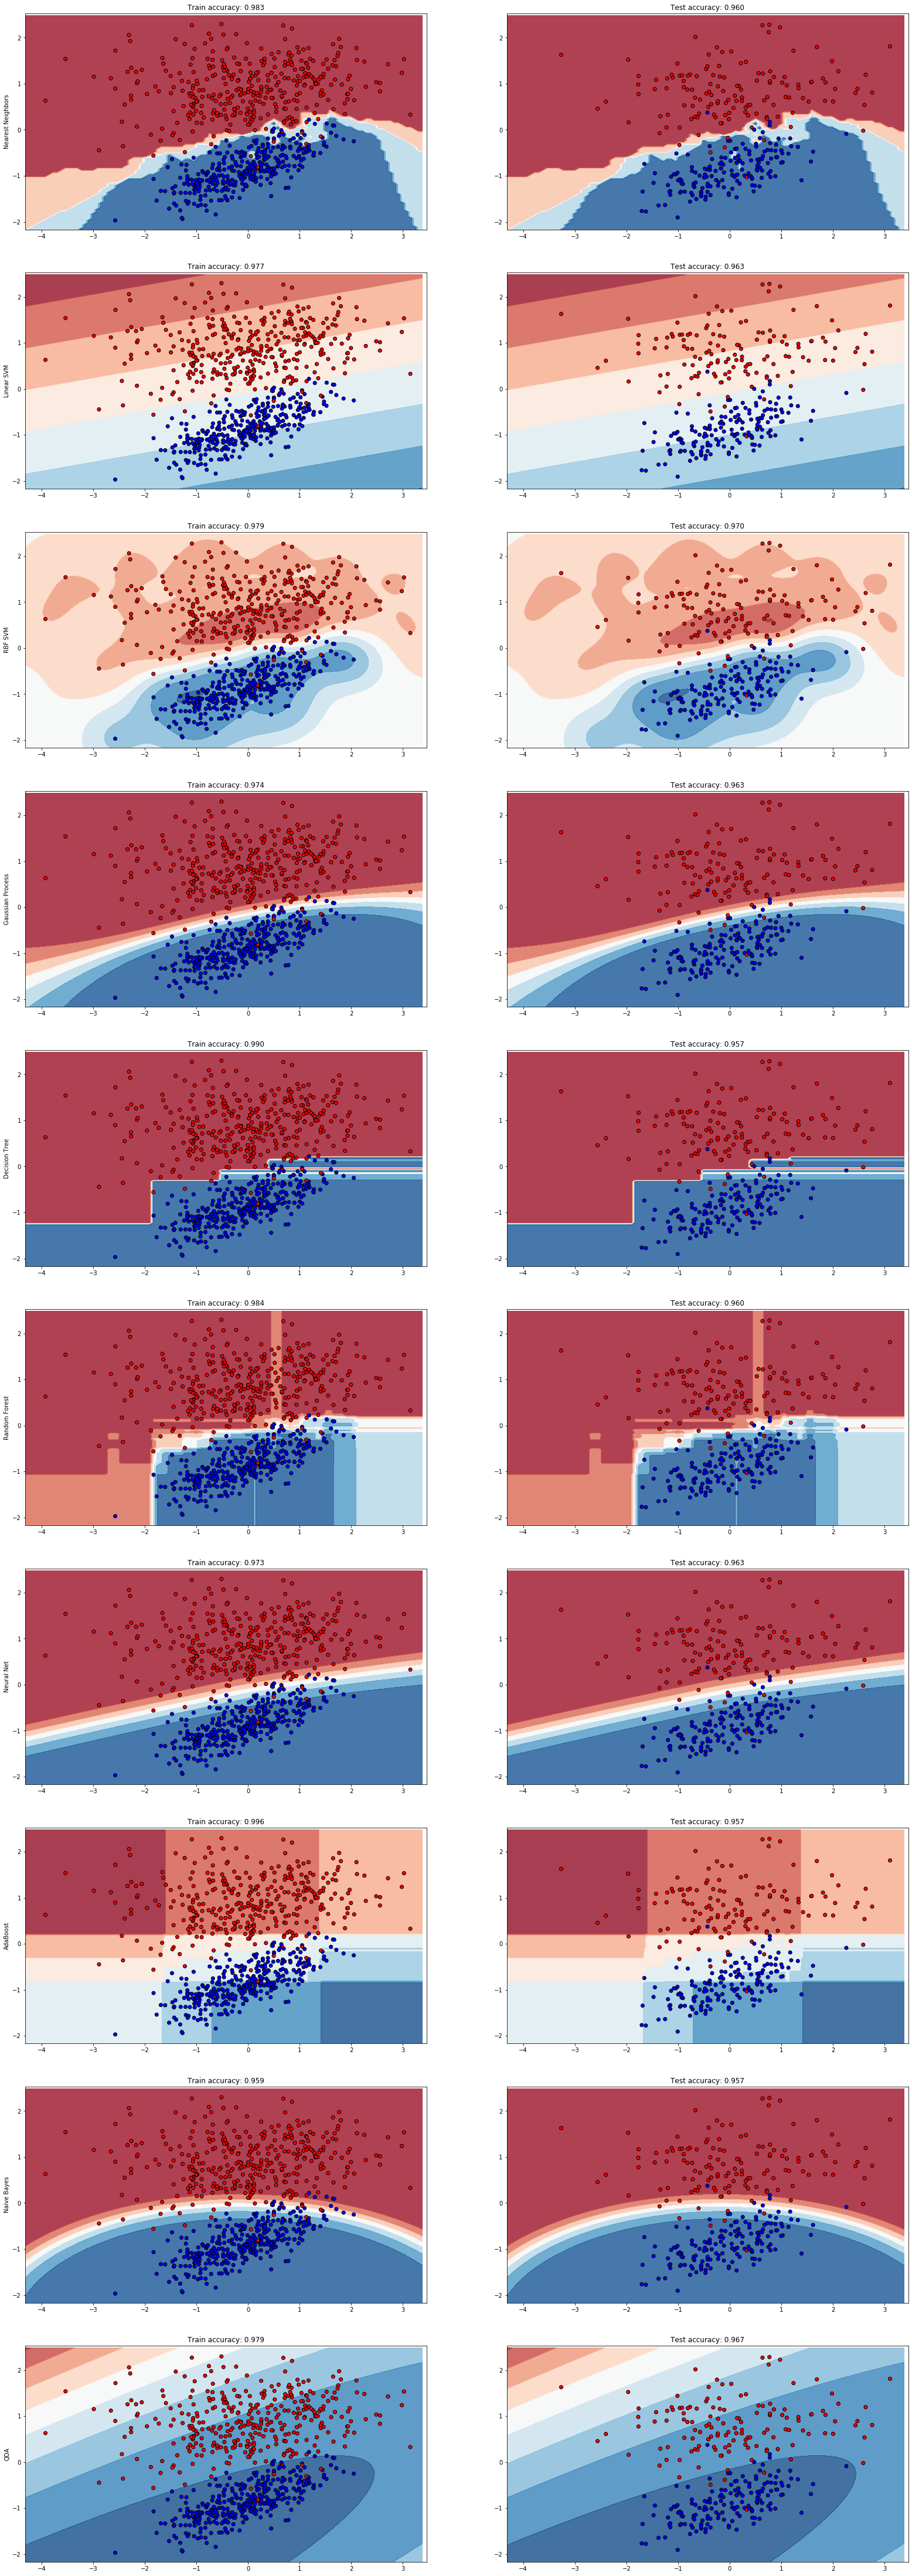

In [6]:
utils.plot_classification(X_train, X_test, y_train, y_test, classifiers)